## Sonar Signal Prediction (Rock vs Mine) using Machine Learning

In [186]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [30]:
## Load the Dataset from csv to pandas DataFrame

data = pd.read_csv("D:\ML Projects\ML PROJECTS\DATA FILES\Copy of sonar data.csv", header=None)

<>:3: SyntaxWarning: invalid escape sequence '\M'
<>:3: SyntaxWarning: invalid escape sequence '\M'
C:\Users\SA\AppData\Local\Temp\ipykernel_18504\1127854113.py:3: SyntaxWarning: invalid escape sequence '\M'
  data = pd.read_csv("D:\ML Projects\ML PROJECTS\DATA FILES\Copy of sonar data.csv", header=None)


In [31]:
## Displaying First 5 rows of the dataset

data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [32]:
## Displaying Last 5 rows of the dataset

data.tail()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M
207,0.0260,0.0363,0.0136,0.0272,0.0214,0.0338,0.0655,0.1400,0.1843,0.2354,...,0.0146,0.0129,0.0047,0.0039,0.0061,0.0040,0.0036,0.0061,0.0115,M


In [33]:
## No of rows and columns

data.shape

(208, 61)

In [34]:
## stats summary of the data

data.describe()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [35]:
## Checking for missing values

data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [36]:
## There is a function called .info() which gives us a datatypes and non-null values in each column.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

As we can see
* There is no null values in the data
* There is only two Types of data(float and Object)

In [ ]:
## we want to check the column "60" [how many labels are R and how many are M [(for Rock and Mineral)]

data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

* There is total of 111 lable for Minerals
* There is total of 97 lable for Rocks

In [ ]:
## We want to know the mean value of each column based on the lable in column 60

data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


#### Data Vizualization:-

1. Histogram (feature vs label)

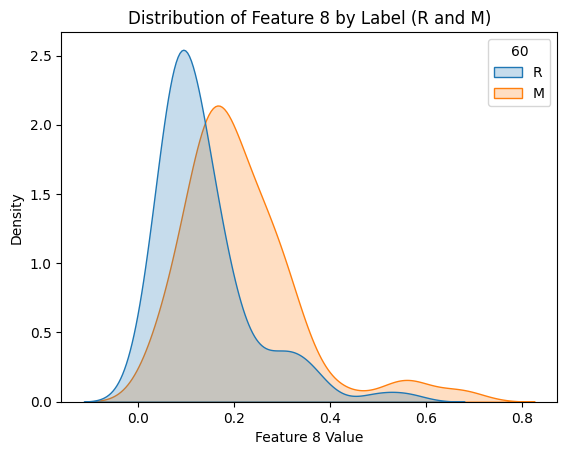

In [74]:
sns.kdeplot(x = data[8], hue = data[60], fill = True)  ## this will plot the distribution of feature 8 for rocks and minerals.
plt.title('Distribution of Feature 8 by Label (R and M)')
plt.xlabel('Feature 8 Value') 
plt.show()

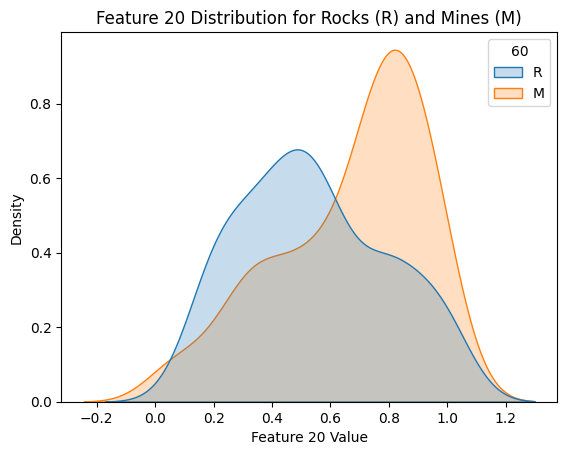

In [58]:

sns.kdeplot(x=data[20], hue=data[60], fill=True)
plt.title("Feature 20 Distribution for Rocks (R) and Mines (M)")
plt.xlabel('Feature 20 Value') 
plt.show()


C:\Users\SA\AppData\Local\Temp\ipykernel_18504\3211466257.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=data[60], y=data[10], palette="muted")


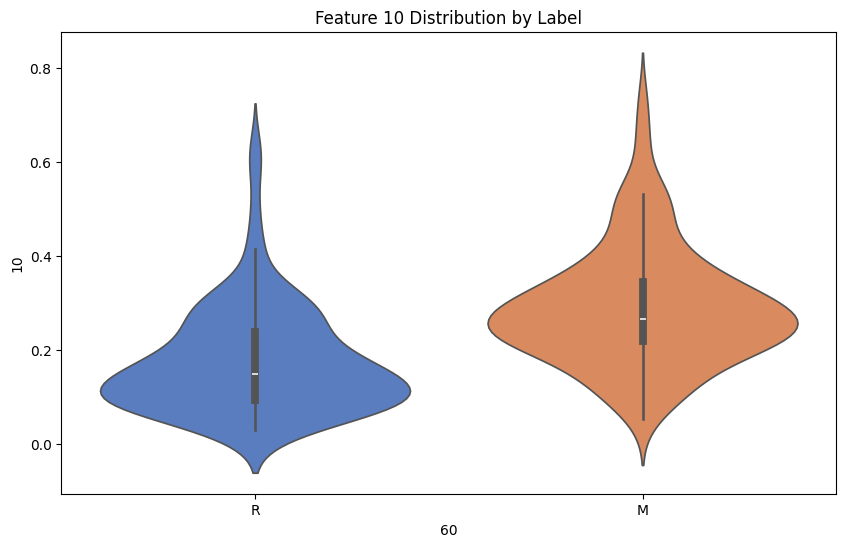

In [47]:
plt.figure(figsize=(10,6))
sns.violinplot(x=data[60], y=data[10], palette="muted")
plt.title("Feature 10 Distribution by Label")
plt.show()


#### Till now we have :-
* Loaded the data set
* Checked for the null values ( Found None)
* Looked at the summary statistics

* After that we have done the Data Vizualization and found:-
* Features 0 & 8 → Mines generally higher but overlap with Rocks.

* Feature 20 → Stronger separation, good discriminator between R and M.

* Together, these features suggest that Mines usually have higher intensity values than Rocks in multiple frequency bands.

#### Now we will separate our Data and Labels

In [76]:
X = data.drop(columns = 60 , axis = 1)    ##  This will drop the column 60 from the data and store the rest of the data in X

Y = data[60]                ## This will store the column 60 in Y

In [77]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [78]:
Y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

#### Standardized the Data set

In [79]:
scalar = StandardScaler()

In [82]:
standardized_data = scalar.fit(X)   ## we use fit function to fit the data to the scalar.

In [83]:
standardized_data = scalar.transform(X)   ## we use transform function to standardize the data.

In [84]:
standardized_data

array([[-0.39955135, -0.04064823, -0.02692565, ...,  0.06987027,
         0.17167808, -0.65894689],
       [ 0.70353822,  0.42163039,  1.05561832, ..., -0.47240644,
        -0.44455424, -0.41985233],
       [-0.12922901,  0.60106749,  1.72340448, ...,  1.30935987,
         0.25276128,  0.25758223],
       ...,
       [ 1.00438083,  0.16007801, -0.67384349, ...,  0.90652575,
        -0.03913824, -0.67887143],
       [ 0.04953255, -0.09539176,  0.13480381, ..., -0.00759783,
        -0.70402047, -0.34015415],
       [-0.13794908, -0.06497869, -0.78861924, ..., -0.6738235 ,
        -0.29860448,  0.99479044]], shape=(208, 60))

#### Now we will be splitting our data into two parts:-
* Training Data
* Testing Data

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 1)


## Here test_size = 0.2 means 20% of the data will be used for testing and 80% will be used for training.
## Stratify = Y means we want to split the data in such a way that the proportion of labels in the training and testing data is same as in the original data.
## Random_state = 1 means we want to get the same split every time we run the

In [106]:
X.shape

(208, 60)

In [107]:
X_train.shape

(166, 60)

In [108]:
X_test.shape

(42, 60)

#### Training the Models:-


1. First We are using the Support Vector Machine Algorithm(SVM)

In [168]:
model_1 = svm.SVC(kernel = "linear", C = 0.5)  ## Here we are using SVM model with linear kernel and C = 0.5

model_1.fit(X_train, Y_train)         

SVC(C=0.5, kernel='linear')

Accuracy score on the training data :-

In [170]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the training data.

X_train_pridic = model_1.predict(X_train)

train_data_accuracy = accuracy_score(X_train_pridic, Y_train)

print("Accuracy score on the training data :- ", train_data_accuracy * 100)



Accuracy score on the training data :-  84.33734939759037


Accuracy Score on the Test Data :-

In [171]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the test data.

X_test_predict = model_1.predict(X_test)

test_data_accuracy =  accuracy_score(X_test_predict, Y_test)

print("Accuracy Score on the Dest Data:- ", test_data_accuracy * 100)

Accuracy Score on the Dest Data:-  73.80952380952381


* The training accuracy is around 84.4%, and the testing accuracy is about 73.9%.
* That’s not bad — the model is doing okay, but it’s not generalizing perfectly.
* Since the dataset is small (only 208 samples), a bit of overfitting is expected and still acceptable.



* Conclusion:-

(I) The model works decently, but we should try out other algorithms to see if we can get better results.


##### 2. Using Logistic Regression Model

In [172]:
model_2 = LogisticRegression() 

model_2.fit(X_train , Y_train)

LogisticRegression()

##### Evaluation of the Model

In [175]:
## Now we will evaluate the model using accuracy score.

X_train_predict = model_2.predict(X_train)

train_data_accuracy = accuracy_score(X_train_predict, Y_train)

print("Accuracy score on the training data :- ", train_data_accuracy * 100)

Accuracy score on the training data :-  84.33734939759037


In [ ]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the test data.

X_test_predict = model_2.predict(X_test)

test_data_accuracy =  accuracy_score(X_test_predict, Y_test)

print("Accuracy Score on the Dest Data:- ", test_data_accuracy * 100)

Accuracy Score on the Dest Data:-  69.04761904761905


* The logistic regression model does alright on the training data, but its accuracy falls a lot on the test data.
* This shows it’s not really learning the true patterns — it’s kind of memorizing the training set instead of generalizing.
* When compared to SVM with a linear kernel, logistic regression performs about the same on training, but does worse on testing.
* So overall, logistic regression isn’t the best choice for this Sonar dataset.

##### 3. Using Decision Tree Model

In [183]:
model_3 = DecisionTreeClassifier()

model_3.fit(X_train, Y_train)

DecisionTreeClassifier()

##### Evaluation of the Model

In [184]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the training data.

X_train_predict =  model_3.predict(X_train)

train_data_accuracy = accuracy_score(X_train_predict, Y_train)

print("Accuracy score on the training data :- ", train_data_accuracy * 100)

Accuracy score on the training data :-  100.0


In [185]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the test data.

X_test_predict = model_3.predict(X_test) 

test_data_accuracy =  accuracy_score(X_test_predict, Y_test)

print("Accuracy Score on the Test Data:- ", test_data_accuracy * 100)

Accuracy Score on the Test Data:-  71.42857142857143


* The model scored perfectly on the training data (100%), which means it learned every tiny detail from it.
* But on the test data, accuracy dropped to about 71%, showing that it struggles with new, unseen examples.
* In short, the tree has overfit — it memorized the training set instead of learning patterns that generalize well.

##### 4. Using the Random Forest

In [202]:
model_4 = RandomForestClassifier(n_estimators=200, random_state=42)    ## random forest with 100 trees means 100 decision trees rather than one decision tree.
                                                                       ## random_state is used to get the same result every time we run the code.
model_4.fit(X_train, Y_train)  

RandomForestClassifier(n_estimators=200, random_state=42)

##### Model Evaluation

In [208]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the training data.

X_train_predict =  model_4.predict(X_train)

train_data_accuracy = accuracy_score(X_train_predict, Y_train)

print("Accuracy score on the training data :- ", train_data_accuracy * 100)

Accuracy score on the training data :-  100.0


In [210]:
## Now we will evaluate the model using accuracy score and print the accuracy score on the test data.

X_test_predict = model_4.predict(X_test) 

test_data_accuracy =  accuracy_score(X_test_predict, Y_test)

print("Accuracy Score on the Test Data:- ", test_data_accuracy * 100)

Accuracy Score on the Test Data:-  80.95238095238095


* The model got a perfect 100% accuracy on the training data, which shows it fit the training set completely.
* On the test data, accuracy is ~81%, which is much better than Decision Tree (71%).
* This means Random Forest is generalizing better than a single tree, though there’s still a bit of overfitting since training accuracy is much higher than testing.

#### Overall Conclusion:-
* Logistic Regression:- 
1. Accuracy was okay, but the gap between training and testing was little  bit large → not the best generalization

* Decision Tree :- 

1. Got 100% accuracy on training data(memorized everything).

2. Performed poorly on testing(clear case of overfitting).

* Random Forest:-

1. Improved test accuracy (better than Decision Tree).

2. Still it is overfiting because training accuracy stayed at 100% while test accuracy dropped.

* SVM (Linear Kernel):-

* Gave a balanced performance.

* Train–test gap was only about 10% (good generalization).


#### Final Choice:
* SVM is the best fit for this dataset because it balances accuracy and generalization better than Logistic Regression, Decision Tree, and Random Forest.

#### Now  we wil make the Predictive Model System:-

In [223]:
input_data  = (0.0707,0.1252,0.1447,0.1644,0.1693,0.0844,0.0715,0.0947,0.1583,0.1247,0.234,0.1764,0.2284,0.3115,0.4725,0.5543,0.5386,0.3746,0.4583,0.5961,0.7464,0.7644,0.5711,0.6257,0.6695,0.7131,0.7567,0.8077,0.8477,0.9289,0.9513,0.7995,0.4362,0.4048,0.4952,0.1712,0.3652,0.3763,0.2841,0.0427,0.5331,0.6952,0.4288,0.3063,0.5835,0.5692,0.263,0.1196,0.0983,0.0374,0.0291,0.0156,0.0197,0.0135,0.0127,0.0138,0.0133,0.0131,0.0154,0.0218)


## Changing the input_data to a numpy array.

input_data_as_numpy_array = np.asarray(input_data)


## reshape the np array as we are predicting for one instance.

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

## Now we have to standardize the input Data.

std_data = scalar.transform(input_data_reshaped)


## Now we will make the prediction.

prediction = model_1.predict(std_data)
print(prediction)


if (prediction[0] == 'R'):
    print("The object is a Rock")  
else:
    print("The object is a Mine")
    
    



['M']
The object is a Mine


### Overall Conclusions:-

In this project, we worked on the Sonar dataset to predict whether an object is a Rock (R) or a Mine (M). We began with some EDA to explore the features and see how Rocks and Mines differ.

Before training, we separated the features (X) and labels (Y). Then, since all features were numeric, we standardized the data so every feature was on the same scale. This step was very important for models like Logistic Regression and SVM. After that, we split the data into training and testing sets.

Next, we trained multiple models — Logistic Regression, SVM, Decision Tree, and Random Forest. Logistic Regression gave a decent start but wasn’t strong on generalization. The Decision Tree memorized the training data (100% train accuracy) but failed to perform on testing (overfitting). Random Forest reduced overfitting compared to a single tree but still wasn’t the best. Finally, SVM gave the most balanced performance, with good accuracy on both train and test, making it the best choice.

At the end, we built a predictive system using the trained SVM model, which can take new sonar signals and predict whether it’s a Rock or a Mine.

**In summary :-** 

- Explored the dataset to understand features.

- Separated features & labels, then standardized the data.

- Split into training and testing sets.

- Trained multiple models and compared results.

- Found SVM to be the best performer.

- Built a Rock vs Mine prediction system.